# MATH 5303 - Fall 2024 Final Project: Predicting Electrical Power Output of a Micro Gas Turbine

Group Members: Gabriel Osei, Richard Yaw Kusi, Troyce Mays, Uriel Ramirez

Due Date: December 8th, 2024, at 11:59 PM


## Abstract
The goal of this project is to forecast the electrical power output (el_power) of a 3-kilowatt commercial micro gas turbine using the input control signal (input_voltage) over time. This study investigates the relationship between the input signal and energy output through the use of time-series data and regression models. The outcome helps to optimize turbine operations and increase energy system efficiency.

## Introduction
Micro gas turbines are small-scale power devices that provide backup and localized energy output. Accurate prediction of electrical power output based on control inputs is critical for ensuring energy stability. This research uses linear regression to study turbine performance and evaluate the model's forecasting skills using measures like MSE and R-squared (R²).

## Uploading Data and Data Wrangling

Data from various trials were uploaded and integrated for training and testing:

Training Data: Experiments 1, 9, 20, 21, 23, and 24.

Testing Data: Experiments 4 and 22.

After loading the datasets, preprocessing steps confirmed that all columns (time, input_voltage, and el_power) were free of null values.


In [1]:
## Installing general packages for use
  # More packages may be installed as needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
## Loading each training file
from google.colab import files
uploaded1= files.upload()
uploaded9 = files.upload()
uploaded20 = files.upload()
uploaded21= files.upload()
uploaded23= files.upload()
uploaded24= files.upload()

Saving ex_1.csv to ex_1.csv


Saving ex_9.csv to ex_9.csv


Saving ex_20.csv to ex_20.csv


Saving ex_21.csv to ex_21.csv


Saving ex_23.csv to ex_23.csv


Saving ex_24.csv to ex_24.csv


In [4]:
## Making trained data sets into data frames
train_df1 = pd.read_csv('ex_1.csv')
train_df2 = pd.read_csv('ex_9.csv')
train_df3 = pd.read_csv('ex_20.csv')
train_df4 = pd.read_csv('ex_21.csv')
train_df5 = pd.read_csv('ex_23.csv')
train_df6 = pd.read_csv('ex_24.csv')

In [5]:
## Merging all TRAINED dataframes into one dataframe
merged_train = pd.concat([train_df1, train_df2, train_df3, train_df4, train_df5, train_df6], ignore_index=True)

In [6]:
## Loading test data
from google.colab import files
uploaded4 = files.upload()
uploaded22 = files.upload()

Saving ex_4.csv to ex_4.csv


Saving ex_22.csv to ex_22.csv


In [7]:
## Loading test data into dataframes
X_test = pd.read_csv('ex_4.csv')
y_test = pd.read_csv('ex_22.csv')

In [8]:
## Merging ALL TEST DATA into one dataframe
merged_test = pd.concat([X_test, y_test], ignore_index=True)

## Data Exploration and Visualization
A scatter plot showed a linear relationship between input_voltage and el_power. The picture below (visualizing train data to see relationship) confirms the viability of using linear regression.


In [9]:
## Checking for columns in merged train dataframe
merged_train.columns
merged_train.info()
merged_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52940 entries, 0 to 52939
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           52940 non-null  float64
 1   input_voltage  52940 non-null  float64
 2   el_power       52940 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


,0
time,0
input_voltage,0
el_power,0


In [10]:
## Checking the information on test dataframe
merged_test.columns
merged_test.info()
merged_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18285 entries, 0 to 18284
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           18285 non-null  float64
 1   input_voltage  18285 non-null  float64
 2   el_power       18285 non-null  float64
dtypes: float64(3)
memory usage: 428.7 KB


,0
time,0
input_voltage,0
el_power,0


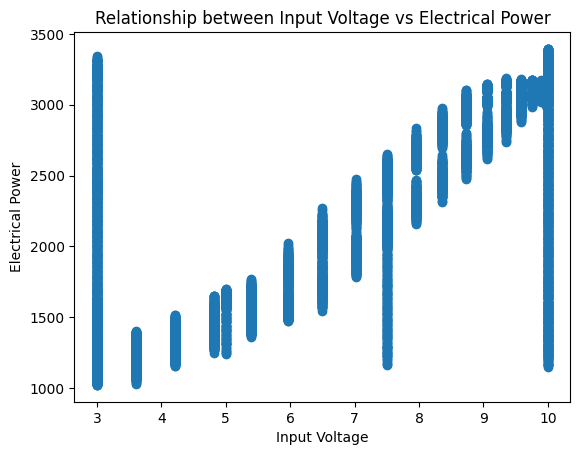

In [11]:
## Visualizing train data to see relationships
# Defining variables for visualization
X_train_viz = merged_test[['input_voltage']]
y_train_viz = merged_test[['el_power']]

# Creating scatter plot of Voltage vs. Electrical Power
plt.scatter(X_train_viz, y_train_viz)
# Labeling the plot
plt.xlabel('Input Voltage')
plt.ylabel('Electrical Power')
plt.title('Relationship between Input Voltage vs Electrical Power')
plt.show()

## Preprocessing
The characteristics (input_voltage) and target (el_power) were divided into training and test sets. These were modified to fit with the regression model.

In [12]:
## Defining the training and test data
# Defining the training data
X_trained = merged_train[['input_voltage']].values.reshape(-1,1)
y_trained = merged_train[['el_power']].values.reshape(-1,1)

# Defining the test data
X_test = merged_test[['input_voltage']].values.reshape(-1,1)
y_test = merged_test[['el_power']].values.reshape(-1,1)

## Model Development and Evaluation
A Linear Regression model was trained on the training data and evaluated using testing data.

In [14]:
## Training a linear model with our data
# Initialize Linear Regression model
Model = LinearRegression()

# Fitting the model
Model.fit(X_trained,y_trained)

# Defining the predicted outputs
yPredicted = Model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, yPredicted)

# Calculating the Coefficient of Determination (R^2)
r2 = r2_score(y_test, yPredicted)

# Printing results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 146440.070540266
R-squared: 0.7760700088775894


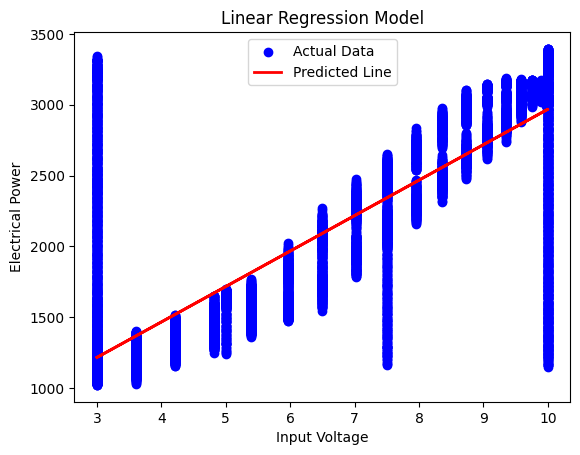

In [15]:
## Visualizing trained model
# Creating scatter plot of test data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Fitting linear regression line to the scatter plot
plt.plot(X_test, yPredicted, color='red', linewidth=2, label='Predicted Line')

# Labeling the plot
plt.xlabel('Input Voltage')
plt.ylabel('Electrical Power')
plt.title('Linear Regression Model')
plt.legend()

# Showing the plot
plt.show()

For model comparison, a Polynomial Regression Model was trained on the training data and tested and evaluated using the testing data.

In [16]:
## Create a polynomial regression model for comparison
# Import necessary package
from sklearn.preprocessing import PolynomialFeatures

# Setting up polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_trained)

# Initializing the model
poly_model = LinearRegression()

# Fitting the model
poly_model.fit(X_poly, y_trained)

# Generating a range of input values for future plotting
X_plot = np.linspace(X_trained.min(), X_trained.max(), 100).reshape(-1, 1)

# Generating predictions for the future plotting range
X_plot_poly = poly_features.transform(X_plot)
y_plot = poly_model.predict(X_plot_poly)

In [17]:
## Running polynomial Regression Diasnostics
# Transform the test data for diagnostics
X_test_poly = poly_features.transform(X_test)

# Predict using the polynomial model
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate and print metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression - Mean Squared Error:", mse_poly)
print("Polynomial Regression - R-squared:", r2_poly)

Polynomial Regression - Mean Squared Error: 142633.16182472184
Polynomial Regression - R-squared: 0.7818913734244005


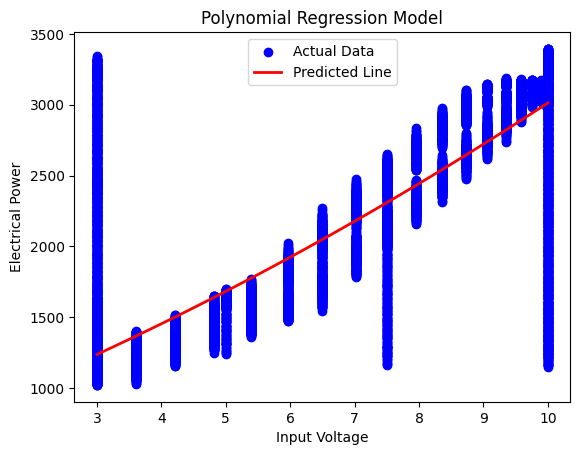

In [18]:
## Visualizing the model
# Graphing the model
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('Input Voltage')
plt.ylabel('Electrical Power')
plt.title('Polynomial Regression Model')
plt.legend()
plt.show()

##Discussion

The model has a strong predictive performance and a high R² value. However, the relatively high MSE suggests that the linear model did not capture all of the data's volatility. Further investigation with advanced regression models (example, polynomial regression) or new characteristics may increase performance.


## Conclusion

This study accurately predicted turbine output by using input voltage as the major attribute. The findings are useful for improving turbine efficiency and contribute to the larger subject of energy systems engineering.
